<a href="https://colab.research.google.com/github/paulgureghian/Deep_Learning_with_Keras/blob/master/AI_Diabetes_Keras_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Created by Paul A. Gureghian in Jan 2019.**

**This Python notebook will build an AI application for** 

**detecting diabetes using a Keras Neural Network.**


**The dataset used is:**    

**'pima_indians_diabetes.csv'.**

# **Pre-process the data.**

* **Mount Google drive.**
* **Import packages.**
* **Import dataset.**
* **Pre-process the dataset.**

In [27]:
### Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Import packages
import numpy as np
import pandas as pd 
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
### Import the dataset
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  
         'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']

df = pd.read_csv('/content/drive/My Drive/Pima_Indians_Diabetes/pima_indians_diabetes.csv', names=names)                        
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
### Set the feature and target variables 
X = df.drop('Class', axis=1)
y = df['Class'] 

print('X:\n\n', X.head(), '\n')
print('y:\n\n', y.head()) 

X:

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

y:

 0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64


In [31]:
### Scale the data
X = scale(X) 

print('Scaled_X:\n', X) 

Scaled_X:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [0]:
### Split dataset into 'train' & 'test' sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
### One hot encoding the target variable
y_train = np_utils.to_categorical(y_train)

print('Y_Train Encoded:\n', y_train) 

Y_Train Encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# **Design and build the neural network model.**

  **The model design:**
  
  * **3 layers.**
  * **22 total neurons.**
  * **Relu & Sigmoid activation functions.**

In [0]:
### Define the neural network model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [0]:
### Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [36]:
### Train the model on the training sets
model.fit(X_train, y_train, epochs=150, batch_size=10) 

Epoch 1/150
514/514 [==============================] - 0s 875us/step - loss: 0.6793 - acc: 0.5457
Epoch 2/150
514/514 [==============================] - 0s 408us/step - loss: 0.6512 - acc: 0.6566
Epoch 3/150
514/514 [==============================] - 0s 416us/step - loss: 0.6173 - acc: 0.6566
Epoch 4/150
514/514 [==============================] - 0s 424us/step - loss: 0.5872 - acc: 0.6537
Epoch 5/150
514/514 [==============================] - 0s 457us/step - loss: 0.5635 - acc: 0.6702
Epoch 6/150
514/514 [==============================] - 0s 489us/step - loss: 0.5462 - acc: 0.6858
Epoch 7/150
514/514 [==============================] - 0s 493us/step - loss: 0.5320 - acc: 0.7053
Epoch 8/150
514/514 [==============================] - 0s 475us/step - loss: 0.5206 - acc: 0.7218
Epoch 9/150
514/514 [==============================] - 0s 454us/step - loss: 0.5089 - acc: 0.7422
Epoch 10/150
514/514 [==============================] - 0s 467us/step - loss: 0.4993 - acc: 0.7510
Epoch 11/150
514/51

# **Post training of the model.**

* **Get a prediction.**
* **Evaluate the accuracy of the prediction.**
* **Plot the loss function.**

In [37]:
### Prediction and Evaluation 
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1) 

accuracy_score(y_test, y_pred) 

0.7322834645669292

Text(0, 0.5, 'loss')

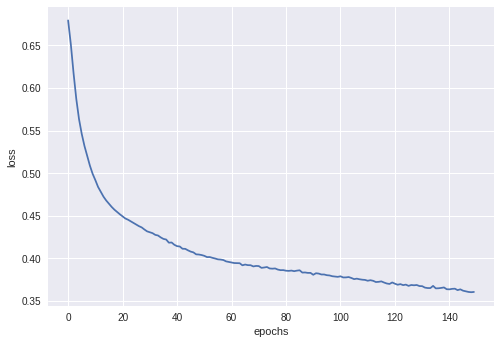

In [38]:
### Plot the loss against the epochs
plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss') 